In [304]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# -----------------------------------------------------------------
# Read in the data set
# -----------------------------------------------------------------

shksprData = pd.read_csv('../data/Shakespeare_data.csv')
shksprData.head()

# -----------------------------------------------------------------

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [305]:
# -----------------------------------------------------------------
# Remove useless data
# -----------------------------------------------------------------

# Delete pointless Dataline column.
del shksprData['Dataline']
# Delete rows that include one or more NaN values.
shksprData = shksprData.dropna()

# -----------------------------------------------------------------

shksprData.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


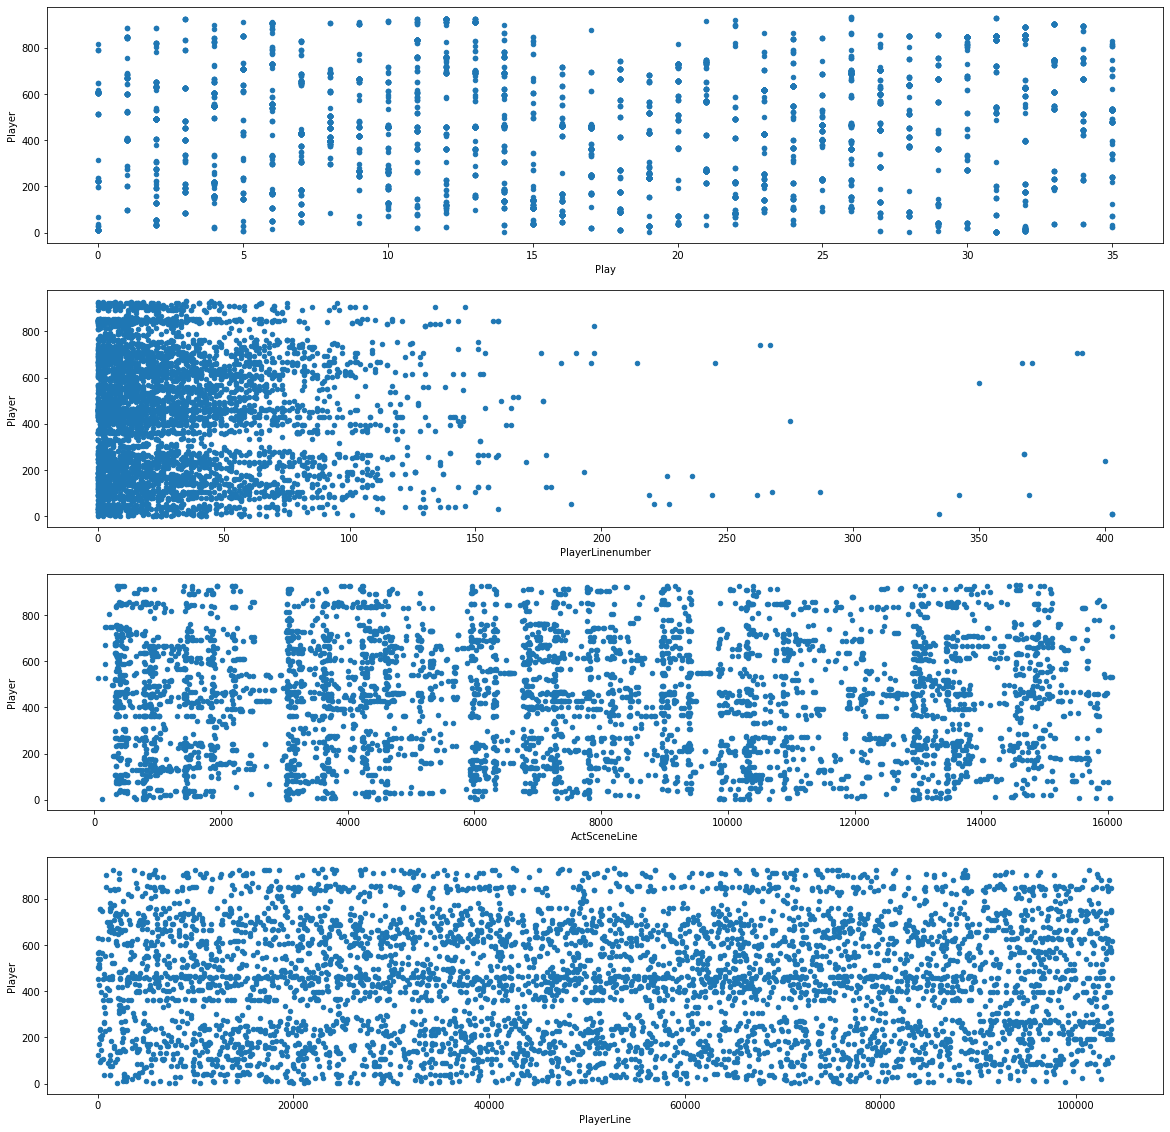

In [306]:
# -----------------------------------------------------------------
# Visualize the data
# -----------------------------------------------------------------

# Encode all of the column values so that we can plot their numeric
# representations and look for correlations.
le = LabelEncoder()
cols = shksprData.columns.tolist()
dataVis = shksprData[cols].apply(
    lambda col: le.fit_transform(col)
)

# Randomly select 5000 rows to plot. Do not show the whole dataset
# because the plot would be too dense.
dataVisSample = dataVis.sample(5000)

# Plot the data sample.
fig, axes = plt.subplots(4)
dataVisSample[['Play', 'Player']].plot.scatter(
    x='Play',
    y='Player',
    ax=axes[0]
)
dataVisSample[['PlayerLinenumber', 'Player']].plot.scatter(
    x='PlayerLinenumber',
    y='Player',
    ax=axes[1]
)
dataVisSample[['ActSceneLine', 'Player']].plot.scatter(
    x='ActSceneLine',
    y='Player',
    ax=axes[2]
)
dataVisSample[['PlayerLine', 'Player']].plot.scatter(
    x='PlayerLine',
    y='Player',
    ax = axes[3]
)

fig.set_size_inches(20, 20)
plt.show()

# -----------------------------------------------------------------

In [307]:
# -----------------------------------------------------------------
# Takeaways from the visualization
# -----------------------------------------------------------------

# 1. Plays contain multiple players, but not many players are in
# multiple plays. Thus, it could be useful for a decision tree,
# since many characters could be ruled out based on the play. Play
# will be used as a feature variable. Since different plays do not
# have any numeric relation to each other, it will be one-hot
# encoded.

# 2. PlayerLinenumber appears to have a correlation with Player,
# so it will be used as a feature variable. PlayerLinenumber is
# already numeric and in the order we want, so we will keep it as
# is.

# 3. ActSceneLine appears to have some correlation with Player. It
# will be used as a feature variable with label encoding since its
# order matters.
leCols = ['ActSceneLine']

# 4. PlayerLine appears to have no correlation with Player based
# on the plot, so it will not be a feature variable.
del shksprData['PlayerLine']

# -----------------------------------------------------------------


# -----------------------------------------------------------------
# Transform the data to be used in a decision tree
# -----------------------------------------------------------------

# Label encode PlayerLineNumber and ActSceneLine.
shksprData[leCols] = shksprData[leCols].apply(
    lambda col: le.fit_transform(col)
)

# One-hot encode Play. See takeaway number 1.
shksprData = pd.get_dummies(
    shksprData,
    columns=['Play'],
    sparse=True
)

# One-hot encode Player since it doesn't have an ordering.
shksprData = pd.get_dummies(
    shksprData,
    columns=['Player'],
    sparse=True
)

# -----------------------------------------------------------------

shksprData.head()

,PlayerLinenumber,ActSceneLine,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,Play_Cymbeline,Play_Hamlet,Play_Henry IV,Play_Henry V,Play_Henry VI Part 1,Play_Henry VI Part 2,Play_Henry VI Part 3,Play_Henry VIII,Play_Julius Caesar,Play_King John,Play_King Lear,Play_Loves Labours Lost,Play_Measure for measure,Play_Merchant of Venice,Play_Merry Wives of Windsor,Play_Much Ado about nothing,Play_Othello,Play_Pericles,Play_Richard II,Play_Richard III,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth,Player_A Lord,Player_A Patrician,Player_A Player,Player_AARON,Player_ABERGAVENNY,Player_ABHORSON,Player_ABRAHAM,Player_ACHILLES,Player_ADAM,Player_ADRIAN,Player_ADRIANA,Player_ADRIANO DE ARMADO,Player_AEGEON,Player_AEMELIA,Player_AEMILIUS,Player_AENEAS,Player_AEdile,Player_AGAMEMNON,Player_AGRIPPA,Player_AJAX,Player_ALBANY,Player_ALCIBIADES,Player_ALENCON,Player_ALEXANDER,Player_ALEXAS,Player_ALICE,Player_ALL,Player_ALONSO,Player_AMIENS,Player_ANDROMACHE,Player_ANGELO,Player_ANGUS,Player_ANNE,Player_ANNE PAGE,Player_ANOTHER,Player_ANTIGONUS,Player_ANTIOCHUS,Player_ANTIPHOLUS,Player_ANTONIO,Player_ANTONY,Player_APEMANTUS,Player_ARCHBISHOP OF YORK,Player_ARCHIDAMUS,Player_ARIEL,Player_ARMADO,Player_ARRAGON,Player_ARTEMIDORUS,Player_ARTHUR,Player_ARVIRAGUS,Player_ATTENDANT,Player_AUDREY,Player_AUFIDIUS,Player_AUSTRIA,Player_AUTOLYCUS,Player_Abbot,Player_All,Player_All Citizens,Player_All Conspirators,Player_All Ladies,Player_All Lords,Player_All Servants,Player_All The Lords,Player_All The People,Player_All the Goths,Player_Apothecary,Player_Attendant,Player_Attendants,Player_BAGOT,Player_BALTHASAR,Player_BALTHAZAR,Player_BANQUO,Player_BAPTISTA,Player_BARDOLPH,Player_BARNARDINE,Player_BASSANIO,Player_BASSET,Player_BASSIANUS,Player_BASTARD,Player_BASTARD OF ORLEANS,Player_BATES,Player_BEATRICE,Player_BEDFORD,Player_BELARIUS,Player_BENEDICK,Player_BENVOLIO,Player_BERNARDO,Player_BERTRAM,Player_BEVIS,Player_BIANCA,Player_BIGOT,Player_BIONDELLO,Player_BIRON,Player_BISHOP OF CARLISLE,Player_BISHOP OF ELY,Player_BLANCH,Player_BLUNT,Player_BOLINGBROKE,Player_BONA,Player_BORACHIO,Player_BOTH,Player_BOTTOM,Player_BOULT,Player_BOURBON,Player_BOYET,Player_BRABANTIO,Player_BRAKENBURY,Player_BRANDON,Player_BRUTUS,Player_BUCKINGHAM,Player_BURGUNDY,Player_BUSHY,Player_Banditti,Player_Bawd,Player_Beadle,Player_Boatswain,Player_Both,Player_Both Citizens,Player_Both Murderers,Player_Both Tribunes,Player_Boy,Player_CADE,Player_CAESAR,Player_CAITHNESS,Player_CAIUS LUCIUS,Player_CALCHAS,Player_CALIBAN,Player_CALPURNIA,Player_CAMBRIDGE,Player_CAMILLO,Player_CANIDIUS,Player_CANTERBURY,Player_CAPHIS,Player_CAPUCIUS,Player_CAPULET,Player_CARDINAL,Player_CARDINAL CAMPEIUS,Player_CARDINAL PANDULPH,Player_CARDINAL WOLSEY,Player_CASCA,Player_CASSANDRA,Player_CASSIO,Player_CASSIUS,Player_CATESBY,Player_CATO,Player_CELIA,Player_CERES,Player_CERIMON,Player_CHARLES,Player_CHARMIAN,Player_CHATILLON,Player_CHIRON,Player_CHRISTOPHER,Player_CICERO,Player_CINNA,Player_CINNA THE POET,Player_CLARENCE,Player_CLAUDIO,Player_CLAUDIUS,Player_CLEOMENES,Player_CLEON,Player_CLEOPATRA,Player_CLERK,Player_CLIFFORD,Player_CLITUS,Player_CLOTEN,Player_COBWEB,Player_COMINIUS,Player_CONRADE,Player_CONSTANCE,Player_CORDELIA,Player_CORIN,Player_CORIOLANUS,Player_CORNELIUS,Player_CORNWALL,Player_COSTARD,Player_COUNTESS,Player_COURT,Player_CRANMER,Player_CRESSIDA,Player_CROMWELL,Player_CURAN,Player_CURIO,Player_CURTIS,Player_CYMBELINE,Player_Captain,Player_Carrier,Player_Chamberlain,Player_Chancellor,Player_Children,Player_Chorus,Player_Citizen,Player_Citizens,Player_Clerk,Player_Clown,Player_Commons,Player_Constable,Player_Courtezan,Player_Crier,Player_Cupid,Player_DARDANIUS,Player_DAUPHIN,Player_DECIUS BRUTUS,Player_DEIPHOBUS,Player_DEME

In [308]:
# -----------------------------------------------------------------
# Create a decision tree and train it on our data
# -----------------------------------------------------------------

# Group the one-hot encoded values
playCols = [i for i in shksprData.columns.tolist() if i.find("Play_") != -1]
playerCols = [i for i in shksprData.columns.tolist() if i.find("Player_") != -1]

# Features.
features = ['PlayerLinenumber', 'ActSceneLine']
features.extend(playCols)
X = shksprData[features]

# Target variable, which is the player speaking.
y = shksprData[playerCols]

# Split the dataset into 80% training data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Create and train the decision tree classifier.
c = DecisionTreeClassifier()
c = c.fit(X_train, y_train)

# Predict the response of the test data.
y_prediction = c.predict(X_test)

print("Decision Tree Accurary: ", metrics.accuracy_score(y_test, y_prediction))

# # -----------------------------------------------------------------

Decision Tree Accurary:  0.7806095763396891
